In [1]:
#Inicio Codigo Rubi Trujillo 01 Julio 2019 16:55pm

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical=pd.merge(mouse_drug,clinical_trial,on='Mouse ID', how='inner')


# Display the data table for preview
mouse_clinical


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#renombrar:df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
mouse_clinical=mouse_clinical.rename(columns={'Tumor Volume (mm3)':'tumor_volume'})
mouse_clinical['tumor_volume']=pd.to_numeric(mouse_clinical.tumor_volume)
mouse_clinical.dtypes
#mouse_clinical.reset_index()
#OK converted into float.
mean_volume_dgxtime=mouse_clinical.groupby(['Drug','Timepoint'])['tumor_volume'].mean().reset_index()

# Convert to DataFrame
mean_volume_dgxtime_DF=pd.DataFrame(mean_volume_dgxtime)
# Preview DataFrame
mean_volume_dgxtime_DF

,Drug,Timepoint,tumor_volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [44]:
#


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# variable must be changed to numerical and name with underscore...
sterr_volume_dgxtime=mouse_clinical.groupby(['Drug','Timepoint'])['tumor_volume'].sem().reset_index()

# Convert to DataFrame
sterr_volume_dgxtime_DF=pd.DataFrame(sterr_volume_dgxtime)
# Preview DataFrame
sterr_volume_dgxtime_DF
#### no yo lo quiereo uno or uno y aqui lo saca del total..

,Drug,Timepoint,tumor_volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
#dataframe tambien para los errores para sacar individual la serie...???

sterr_volume_dgxtime_DF_ts=sterr_volume_dgxtime_DF.pivot(index ='Timepoint', columns ='Drug', values='tumor_volume')

sterr_volume_dgxtime_DF_ts




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
# Minor Data Munging to Re-Format the Data Frames
# Transpose doesnt work as I want..then apply pivot table instead
# pivoting the dataframe 

#trato de cambiar el indice desde el principio.
mean_volume_dgxtime_DF.reindex()
mean_vol_dgxtime_DF_ts=mean_volume_dgxtime_DF.pivot(index ='Timepoint', columns ='Drug', values='tumor_volume')


# Preview that Reformatting worked
mean_vol_dgxtime_DF_ts.head()

#delete drugs that I dont want to analyze
mean4_vol_dgxtime_DF_ts =mean_vol_dgxtime_DF_ts.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
 axis=1)      
mean4_vol_dgxtime_DF_ts 

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [8]:
#omited meanwhile.. i think there is another way to graph
#Generate values to graph, one per drug... dont know how to graph all together..
#create Capomulin, Infubinol, Ketapril, and Placebo
Capomulin=mean_volume_dgxtime_DF.loc[mean_volume_dgxtime_DF['Drug']=='Capomulin',['Timepoint','tumor_volume']].reset_index()
Capomulin.head(10)
Infubinol=mean_volume_dgxtime_DF.loc[mean_volume_dgxtime_DF['Drug']=='Infubinol',['Timepoint','tumor_volume']].reset_index()
Infubinol.head(10)
Ketapril=mean_volume_dgxtime_DF.loc[mean_volume_dgxtime_DF['Drug']=='Ketapril',['Timepoint','tumor_volume']].reset_index()
Ketapril.head(10)
Placebo=mean_volume_dgxtime_DF.loc[mean_volume_dgxtime_DF['Drug']=='Placebo',['Timepoint','tumor_volume']].reset_index()
Placebo.head(10)

# select series for SEM...for each four drug

SEM_Capomulin=sterr_volume_dgxtime_DF.loc[sterr_volume_dgxtime_DF['Drug']=='Capomulin',['Timepoint','tumor_volume']].reset_index()
SEM_Capomulin.head(10)
SEM_Infubinol=sterr_volume_dgxtime_DF.loc[sterr_volume_dgxtime_DF['Drug']=='Infubinol',['Timepoint','tumor_volume']].reset_index()
SEM_Infubinol.head(10)
SEM_Ketapril=sterr_volume_dgxtime_DF.loc[sterr_volume_dgxtime_DF['Drug']=='Ketapril',['Timepoint','tumor_volume']].reset_index()
SEM_Ketapril.head(10)
SEM_Placebo=sterr_volume_dgxtime_DF.loc[sterr_volume_dgxtime_DF['Drug']=='Placebo',['Timepoint','tumor_volume']].reset_index()
SEM_Placebo.head(10)




,index,Timepoint,tumor_volume
0,50,0,0.000000
1,51,5,0.218091
2,52,10,0.402064
3,53,15,0.614461
4,54,20,0.839609
5,55,25,1.034872
6,56,30,1.218231
7,57,35,1.287481
8,58,40,1.370634
9,59,45,1.351726


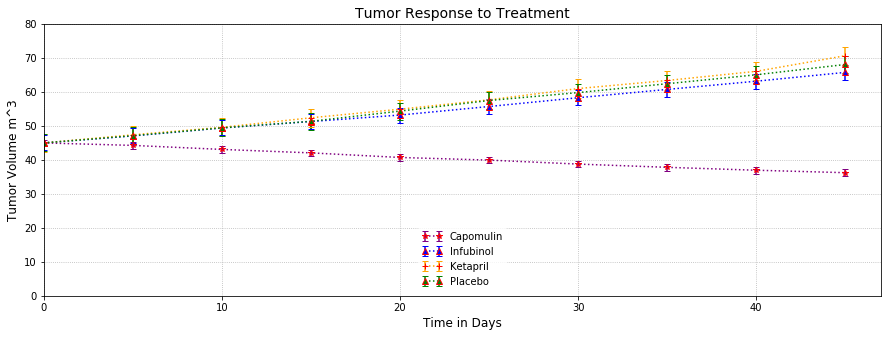

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [22]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# ploting per drug: timepoint vs tumor

drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","blue","orange","green"]
markers=["*","^","+","^"]

#make a bigger graph...to see bether
plt.rcParams['figure.figsize'] = [15,5]
# Intializing the plots
fig, ax = plt.subplots()

#loop to read all columns in DF to plot 
for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error for the graph
    x_axis=mean4_vol_dgxtime_DF_ts.index.values
    y_axis=mean4_vol_dgxtime_DF_ts [drug] 
    SE=sem(mean4_vol_dgxtime_DF_ts [drug])
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    # Setting up the plot
    ax.errorbar(x_axis, y_axis,SE,linestyle= ':',color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='red')
    # Setting the legend
    ax.legend(loc="lower center", fancybox=True,numpoints=2,edgecolor="none")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,47)
ax.set_ylim(0,80)
# Setting the title,x_axis and y_axis labels
ax.set_title("Tumor Response to Treatment", fontsize=14)
ax.set_xlabel("Time in Days", fontsize=12)
ax.set_ylabel("Tumor Volume m^3", fontsize=12)

# Display the graph
plt.show()



mean4_vol_dgxtime_DF_ts


In [99]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mouse_clinical=mouse_clinical.rename(columns={'Metastatic Sites':'Metastatic'})
mouse_clinical['Metastatic']=pd.to_numeric(mouse_clinical.Metastatic)
metasta=mouse_clinical.groupby(['Drug','Timepoint'])['Metastatic'].mean().reset_index()

# Convert to DataFrame
mean_metasta_DF=pd.DataFrame(metasta)
#ok esta en float...
metasta.dtypes
# Preview DataFrame
mean_metasta_DF


,Drug,Timepoint,Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [11]:

#trato de cambiar el indice desde el principio.
mean_metasta_DF.reindex()
mean_metasta_DF_ts=mean_metasta_DF.pivot(index ='Timepoint', columns ='Drug', values='Metastatic')

# Preview that Reformatting worked
mean_metasta_DF_ts.head()

#delete drugs that I dont want to analyze
mean_metasta_DF_ts =mean_metasta_DF_ts.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)      
mean_metasta_DF_ts 

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


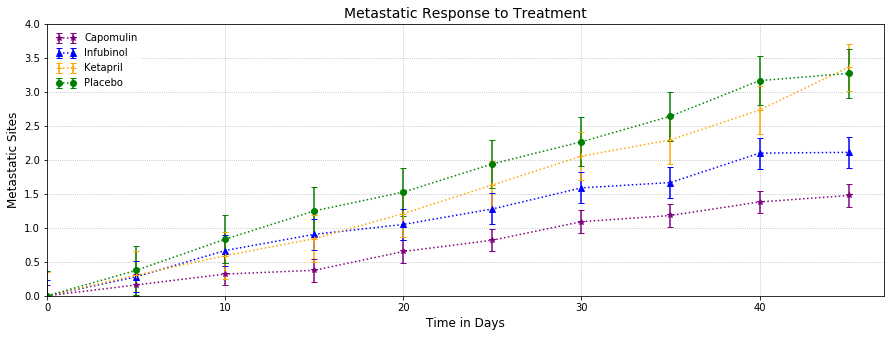

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [19]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# ploting per drug: timepoint vs Metastatic
#keep the same param. as previous plot

drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","blue","orange","green"]
markers=["*","^","+","o"]
colormark=["purple","blue","orange","green"]

#make a bigger graph...to see bether
plt.rcParams['figure.figsize'] = [15, 5]

# Intializing the plots
fig, ax = plt.subplots()

#loop to read all columns in DF to plot 
for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error for the graph
    x_axis=mean_metasta_DF_ts .index.values
    y_axis=mean_metasta_DF_ts [drug] 
    SE=sem(mean_metasta_DF_ts [drug])
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    # Setting up the plot
    ax.errorbar(x_axis, y_axis,SE,linestyle= ':',color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor=colormark[index])
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="none")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,47)
ax.set_ylim(0,4)
# Setting the title,x_axis and y_axis labels
ax.set_title("Metastatic Response to Treatment", fontsize=14)
ax.set_xlabel("Time in Days", fontsize=12)
ax.set_ylabel("Metastatic Sites", fontsize=12)

# Display the graph
plt.show()


mean_metasta_DF_ts



In [25]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [24]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


In [29]:
#mouse_drug
clinical_trial

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
5,h246,0,45.000000,0
6,p189,0,45.000000,0
7,n923,0,45.000000,0
8,q119,0,45.000000,0
9,f993,0,45.000000,0


## Survival Rates

In [37]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate) 
#the same as previous but just counting

mouse_survive=mouse_clinical.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()
mouse_survive

mouse_survive.reindex()
mouse_survive_ts=mouse_survive.pivot(index ='Timepoint', columns ='Drug', values='Mouse ID')

# Preview that Reformatting worked
mouse_survive_ts.head()

#delete drugs that I dont want to analyze
mouse_survive_ts=mouse_survive_ts.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)      
mouse_survive_ts 



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


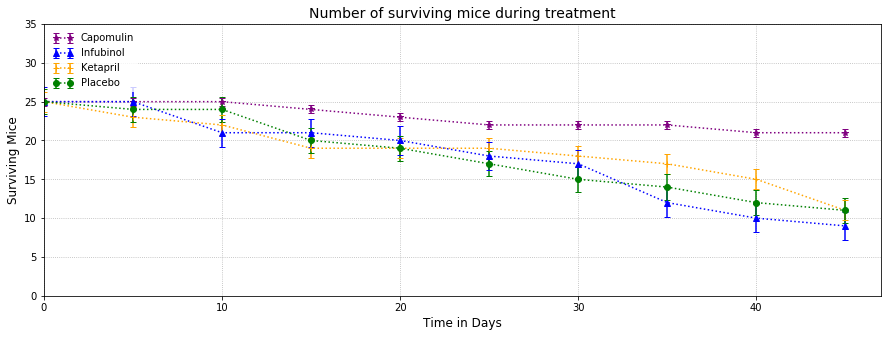

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [43]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# ploting per drug: timepoint vs Metastatic
#keep the same param. as previous plot

drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","blue","orange","green"]
markers=["*","^","+","o"]
colormark=["purple","blue","orange","green"]

#make a bigger graph...to see bether
plt.rcParams['figure.figsize'] = [15, 5]

# Intializing the plots
fig, ax = plt.subplots()

#loop to read all columns in DF to plot 
for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error for the graph
    x_axis=mouse_survive_ts.index.values
    y_axis=mouse_survive_ts [drug] 
    SE=sem(mouse_survive_ts [drug])
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    # Setting up the plot
    ax.errorbar(x_axis, y_axis,SE,linestyle= ':',color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor=colormark[index])
    # Setting the legend
    ax.legend(loc="upper left", fancybox=True,numpoints=2,edgecolor="none")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,47)
ax.set_ylim(0,35)
# Setting the title,x_axis and y_axis labels
ax.set_title("Number of surviving mice during treatment", fontsize=14)
ax.set_xlabel("Time in Days", fontsize=12)
ax.set_ylabel("Surviving Mice", fontsize=12)

# Display the graph
plt.show()


mouse_survive_ts 

In [72]:
#survival rate equals surviving mice/initial mice x 100
mice_ini=25

mouse_survive_ts.dtypes  #ok integer
survive=((mouse_survive_ts/mice_ini)*100)
#show percentages
survive


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


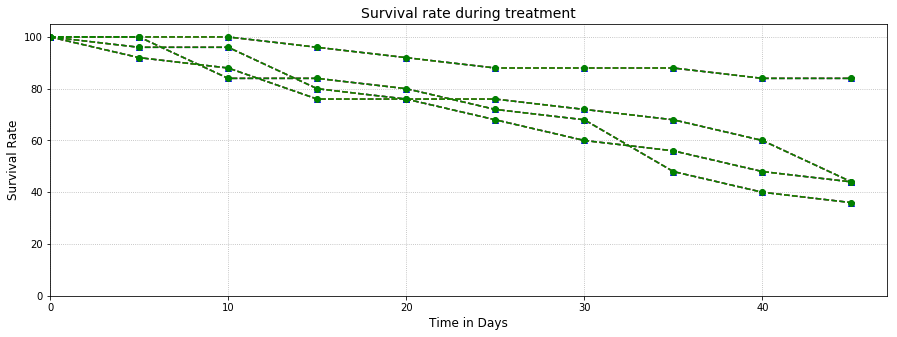

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [97]:
# ploting Survival rates
#keep the same param. as previous plot

drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","blue","orange","green"]
markers=["*","^","+","o"]
colormark=["purple","blue","orange","green"]

#make a bigger graph...to see bether
plt.rcParams['figure.figsize'] = [15, 5]

# Intializing the plots
fig, ax = plt.subplots()

#loop to read all columns in DF to plot 
for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error for the graph
    x_axis=mouse_survive_ts.index.values
    y_axis=survival
    
    # Finding the index of each drug to get its respective color and marker
    index=drugs.index(drug)
    #plot configure
    ax.plot(x_axis, y_axis,linestyle="--",color=colors[index], marker=markers[index],markeredgecolor=colormark[index])
      # Setting the legend
    ax.legend(loc="lower left", fancybox=True,numpoints=2,edgecolor="none")

# Setting the grid   
plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,47)
ax.set_ylim(0,105)
# Setting the title,x_axis and y_axis labels
ax.set_title("Survival rate during treatment", fontsize=14)
ax.set_xlabel("Time in Days", fontsize=12)
ax.set_ylabel("Survival Rate", fontsize=12)

# Display the graph
plt.show()
mouse_survive_ts


## Summary Bar Graph

In [94]:
# Calculate the percent changes for each drug

change45days=round(((mean_vol_dgxtime_DF_ts.iloc[9,:]-mean_vol_dgxtime_DF_ts.iloc[0,:])/mean_vol_dgxtime_DF_ts.iloc[0,:])*100,2)
change45days
# Display the data to confirm


Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

In [95]:
ChangePercent_DF=pd.DataFrame(change45days)
ChangePercent_DF
ChangePercent_DF=ChangePercent_DF.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol']) 
ChangePercent_DF

,0
Drug,
Capomulin,-19.48
Infubinol,46.12
Ketapril,57.03
Placebo,51.30


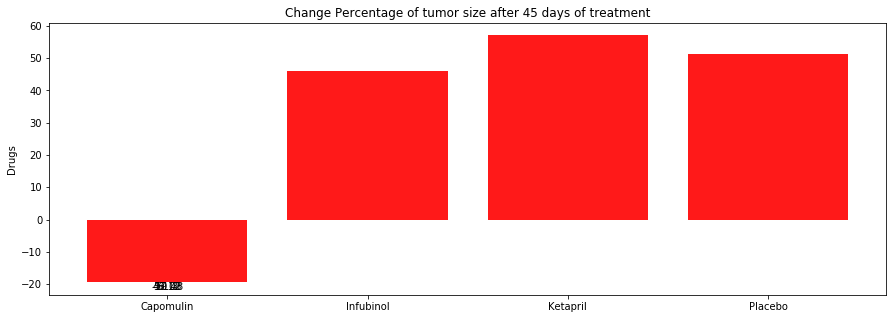

In [166]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days


Drug = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
y_axis=np.arange(len(Drug))
height=(-19.48,46.12,57.03,51.30)
width = 10
#dummy var to indentify positive or negative
#pendiente

fig, ax = plt.subplots()

graph=plt.bar(y_axis,height, align='center', alpha=0.9, color='r')
plt.xticks(y_axis, Drug)
plt.ylabel('Drugs')
plt.title('Change Percentage of tumor size after 45 days of treatment')


def autolabel(rects):
    for i, v in enumerate(graph):
        alto = rect.get_height()    
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*alto, height[i],ha='center', va='center_baseline', rotation=0)

autolabel(graph)


fig.show()